In [1]:
#importing necessary libraries 

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as p

In [2]:
#setting complete epoch number to 100 and earlystopping to 5 epochs

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
EPOCHS = 100

In [3]:
#importing dataset 

df = pd.read_csv('stroke.csv')

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
#checking for implicit null values in column 'smoking_status' and replacing level 'Unknown' to NaNs

df.smoking_status.value_counts()
df['smoking_status']=df['smoking_status'].replace(['Unknown'],np.NaN)

In [6]:
#data preprocessing, mapping categorical variables to one hot encoded version

df = pd.get_dummies(df, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [7]:
#replacing NaN values in bmi with its mean 

bmi_mean=df.bmi.mean()
values={'bmi':int(bmi_mean)}
df=df.fillna(value=values)
df.bmi.isnull().any()

False

In [8]:
#dropping the rest of NaNs and id, as it's not useful for building a predictive model 

df=df.dropna()
df=df.drop('id', axis=1)

In [9]:
#scaling variables values to smaller ones to optimise model accuracy

df_scaled = p.StandardScaler().fit_transform(df.iloc[:,:-1])

In [10]:
#checking scaled values in all rows of the first column 

df_scaled[:,0]

array([ 1.05143428,  0.78607007,  1.62639008, ..., -0.36384151,
        0.34379639,  0.03420481])

In [11]:
#splitting dataset to train and test subsets 0.6 to 0.4, splitting test subset to test and validation subsets 0.5 to 0.5 

X_train, X_val, y_train, y_val = train_test_split(df_scaled, df.iloc[:,-1], train_size = 0.6, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, train_size = 0.5, random_state=1)

In [12]:
#building small model with 3 dense layers 

model_small= Sequential()
model_small.add(Dense(4, activation = 'relu'))
#model_small.add(BatchNormalization())
model_small.add(Dense(2, activation = 'relu'))
model_small.add(Dense(1, activation = 'sigmoid'))

model_small.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])
history_small =  model_small.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_test, y_test))

Epoch 1/100
96/96 [==============================] - 2s 6ms/step - loss: 0.5381 - accuracy: 0.8461 - val_loss: 0.5081 - val_accuracy: 0.8425
Epoch 2/100
96/96 [==============================] - 0s 5ms/step - loss: 0.4623 - accuracy: 0.8461 - val_loss: 0.4527 - val_accuracy: 0.8425
Epoch 3/100
96/96 [==============================] - 0s 4ms/step - loss: 0.4236 - accuracy: 0.8461 - val_loss: 0.4201 - val_accuracy: 0.8425
Epoch 4/100
96/96 [==============================] - 0s 4ms/step - loss: 0.3963 - accuracy: 0.8461 - val_loss: 0.3939 - val_accuracy: 0.8425
Epoch 5/100
96/96 [==============================] - 0s 4ms/step - loss: 0.3728 - accuracy: 0.8461 - val_loss: 0.3698 - val_accuracy: 0.8425
Epoch 6/100
96/96 [==============================] - 0s 4ms/step - loss: 0.3491 - accuracy: 0.8461 - val_loss: 0.3424 - val_accuracy: 0.8425
Epoch 7/100
96/96 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.8461 - val_loss: 0.3154 - val_accuracy: 0.8425
Epoch 8/100
9

Epoch 59/100
96/96 [==============================] - 1s 6ms/step - loss: 0.2222 - accuracy: 0.8637 - val_loss: 0.2271 - val_accuracy: 0.8611
Epoch 60/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2219 - accuracy: 0.8594 - val_loss: 0.2267 - val_accuracy: 0.8483
Epoch 61/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2218 - accuracy: 0.8601 - val_loss: 0.2257 - val_accuracy: 0.8571
Epoch 62/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2222 - accuracy: 0.8614 - val_loss: 0.2268 - val_accuracy: 0.8464
Epoch 63/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2220 - accuracy: 0.8575 - val_loss: 0.2261 - val_accuracy: 0.8464
Epoch 64/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2217 - accuracy: 0.8620 - val_loss: 0.2264 - val_accuracy: 0.8601
Epoch 65/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2219 - accuracy: 0.8617 - val_loss: 0.2264 - val_accuracy: 0.8483
Epoch 

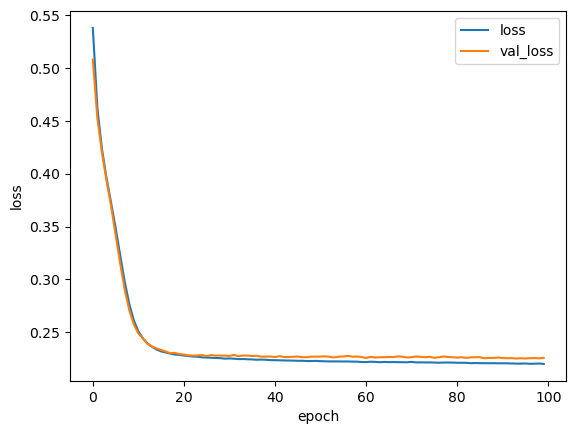

In [13]:
#plotting small model's loss on train and validation subsets 

hist_small = pd.DataFrame(history_small.history)

plt.plot(hist_small.loss, label = "loss")
plt.plot(hist_small.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig('mala_loss.png')

In [14]:
#checking small model's accuaracy for train and test subsets 

output = model_small.evaluate(X_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.8454


In [15]:
#building medium size model with 5 dense layers 

model_medium = Sequential()
model_medium.add(Dense(16, activation = 'relu'))
model_medium.add(Dense(8, activation = 'relu'))
model_medium.add(Dense(4, activation = 'relu'))
model_medium.add(Dense(2, activation = 'relu'))
model_medium.add(Dense(1, activation = 'sigmoid'))

model_medium.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])
history_medium =  model_medium.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_test, y_test))

Epoch 1/100
96/96 [==============================] - 2s 6ms/step - loss: 0.6283 - accuracy: 0.8461 - val_loss: 0.5272 - val_accuracy: 0.8425
Epoch 2/100
96/96 [==============================] - 0s 4ms/step - loss: 0.4357 - accuracy: 0.8461 - val_loss: 0.3804 - val_accuracy: 0.8425
Epoch 3/100
96/96 [==============================] - 0s 4ms/step - loss: 0.3496 - accuracy: 0.8461 - val_loss: 0.3246 - val_accuracy: 0.8425
Epoch 4/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2904 - accuracy: 0.8461 - val_loss: 0.2708 - val_accuracy: 0.8425
Epoch 5/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2508 - accuracy: 0.8461 - val_loss: 0.2449 - val_accuracy: 0.8425
Epoch 6/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2370 - accuracy: 0.8461 - val_loss: 0.2371 - val_accuracy: 0.8425
Epoch 7/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2324 - accuracy: 0.8461 - val_loss: 0.2350 - val_accuracy: 0.8425
Epoch 8/100
9

Epoch 59/100
96/96 [==============================] - 1s 6ms/step - loss: 0.2044 - accuracy: 0.8836 - val_loss: 0.2574 - val_accuracy: 0.8434
Epoch 60/100
96/96 [==============================] - 1s 6ms/step - loss: 0.2027 - accuracy: 0.8937 - val_loss: 0.2449 - val_accuracy: 0.8464
Epoch 61/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2043 - accuracy: 0.8891 - val_loss: 0.2529 - val_accuracy: 0.8454
Epoch 62/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2038 - accuracy: 0.8849 - val_loss: 0.2572 - val_accuracy: 0.8434
Epoch 63/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2031 - accuracy: 0.8881 - val_loss: 0.2550 - val_accuracy: 0.8395
Epoch 64/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2020 - accuracy: 0.8917 - val_loss: 0.2589 - val_accuracy: 0.8434
Epoch 65/100
96/96 [==============================] - 1s 13ms/step - loss: 0.2020 - accuracy: 0.8914 - val_loss: 0.2647 - val_accuracy: 0.8434
Ep

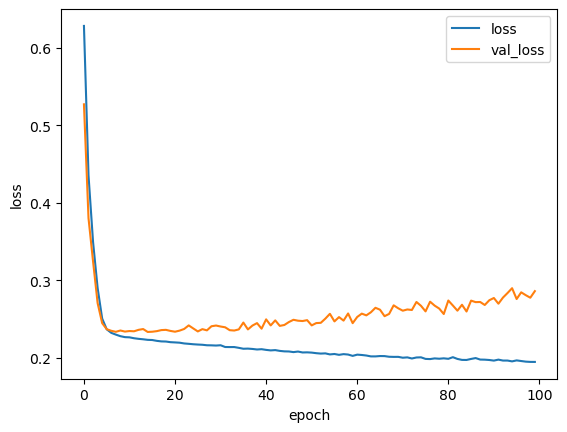

In [16]:
#plotting medium model's loss on train and validation subsets 

hist_medium = pd.DataFrame(history_medium.history)

plt.plot(hist_medium.loss, label = "loss")
plt.plot(hist_medium.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig('srednia_loss.png')


In [17]:
#checking medium model's accuaracy for train and test subsets 

output = model_medium.evaluate(X_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.2862 - accuracy: 0.8464


In [18]:
#building big model with 7 dense layers

model_big = Sequential()
model_big.add(Dense(64, activation = 'relu'))
model_big.add(Dense(32, activation = 'relu'))
model_big.add(Dense(16, activation = 'relu'))
model_big.add(Dense(8, activation = 'relu'))
model_big.add(Dense(4, activation = 'relu'))
model_big.add(Dense(2, activation = 'relu'))
model_big.add(Dense(1, activation = 'sigmoid'))

model_big.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])
history_big =  model_big.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_test, y_test))

Epoch 1/100
96/96 [==============================] - 3s 8ms/step - loss: 0.3909 - accuracy: 0.8461 - val_loss: 0.2959 - val_accuracy: 0.8425
Epoch 2/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2535 - accuracy: 0.8461 - val_loss: 0.2366 - val_accuracy: 0.8425
Epoch 3/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2339 - accuracy: 0.8461 - val_loss: 0.2314 - val_accuracy: 0.8425
Epoch 4/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2296 - accuracy: 0.8461 - val_loss: 0.2302 - val_accuracy: 0.8434
Epoch 5/100
96/96 [==============================] - 1s 7ms/step - loss: 0.2291 - accuracy: 0.8487 - val_loss: 0.2272 - val_accuracy: 0.8444
Epoch 6/100
96/96 [==============================] - 1s 5ms/step - loss: 0.2257 - accuracy: 0.8604 - val_loss: 0.2282 - val_accuracy: 0.8483
Epoch 7/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2239 - accuracy: 0.8646 - val_loss: 0.2361 - val_accuracy: 0.8425
Epoch 8/100
9

Epoch 59/100
96/96 [==============================] - 0s 5ms/step - loss: 0.1833 - accuracy: 0.9054 - val_loss: 0.3050 - val_accuracy: 0.8327
Epoch 60/100
96/96 [==============================] - 0s 5ms/step - loss: 0.1827 - accuracy: 0.9067 - val_loss: 0.3375 - val_accuracy: 0.8434
Epoch 61/100
96/96 [==============================] - 0s 4ms/step - loss: 0.1804 - accuracy: 0.9067 - val_loss: 0.3170 - val_accuracy: 0.8415
Epoch 62/100
96/96 [==============================] - 0s 4ms/step - loss: 0.1833 - accuracy: 0.9035 - val_loss: 0.3240 - val_accuracy: 0.8415
Epoch 63/100
96/96 [==============================] - 0s 4ms/step - loss: 0.1819 - accuracy: 0.9090 - val_loss: 0.3151 - val_accuracy: 0.8434
Epoch 64/100
96/96 [==============================] - 0s 4ms/step - loss: 0.1812 - accuracy: 0.9061 - val_loss: 0.3247 - val_accuracy: 0.8464
Epoch 65/100
96/96 [==============================] - 0s 5ms/step - loss: 0.1778 - accuracy: 0.9116 - val_loss: 0.3309 - val_accuracy: 0.8454
Epoch 

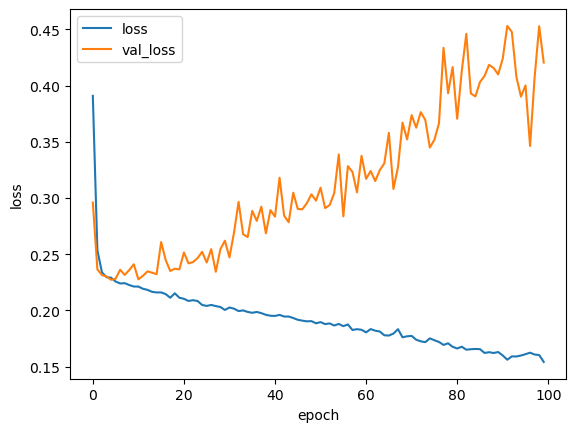

In [19]:
#plotting big model's loss on train and validation subsets 

hist_big = pd.DataFrame(history_big.history)

plt.plot(hist_big.loss, label = "loss")
plt.plot(hist_big.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig('duza_loss.png')

In [20]:
#checking big model's accuaracy for train and test subsets 

output = model_big.evaluate(X_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.8425


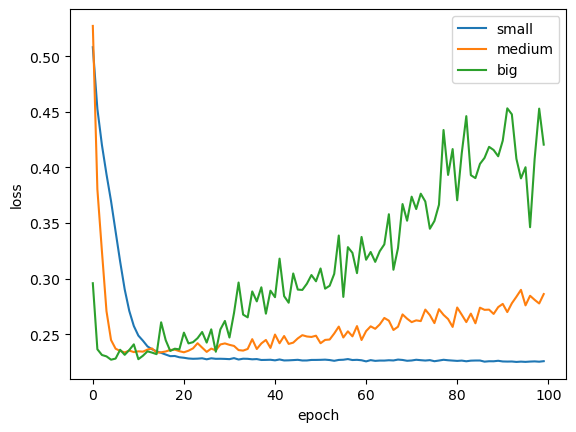

In [21]:
#loss comparison between models

plt.plot(hist_small.val_loss, label = "small")
plt.plot(hist_medium.val_loss, label = "medium")
plt.plot(hist_big.val_loss, label = "big")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig('loss_function_comparison.png')

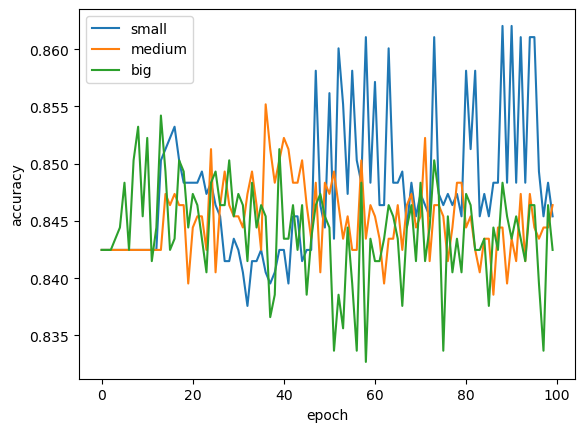

In [22]:
#accuracy comparison between models

plt.plot(hist_small.val_accuracy, label = "small")
plt.plot(hist_medium.val_accuracy, label = "medium")
plt.plot(hist_big.val_accuracy, label = "big")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.savefig('accuracy_comparison.png')

In [23]:
#trying to optimise medium model employing regularisation

model_medium_2 = Sequential()
model_medium_2.add(Dense(16, activation = 'relu', kernel_regularizer='l2'))
model_medium_2.add(Dense(8, activation = 'relu', kernel_regularizer='l2'))
model_medium_2.add(Dense(4, activation = 'relu', kernel_regularizer='l2'))
model_medium_2.add(Dense(2, activation = 'relu', kernel_regularizer='l2'))
model_medium_2.add(Dense(1, activation = 'sigmoid'))

model_medium_2.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])
history_medium_2 =  model_medium_2.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_test, y_test))

Epoch 1/100
96/96 [==============================] - 2s 6ms/step - loss: 0.8813 - accuracy: 0.8461 - val_loss: 0.7206 - val_accuracy: 0.8425
Epoch 2/100
96/96 [==============================] - 0s 4ms/step - loss: 0.6397 - accuracy: 0.8461 - val_loss: 0.5778 - val_accuracy: 0.8425
Epoch 3/100
96/96 [==============================] - 0s 4ms/step - loss: 0.5210 - accuracy: 0.8461 - val_loss: 0.4734 - val_accuracy: 0.8425
Epoch 4/100
96/96 [==============================] - 0s 4ms/step - loss: 0.4361 - accuracy: 0.8461 - val_loss: 0.4057 - val_accuracy: 0.8425
Epoch 5/100
96/96 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.8461 - val_loss: 0.3725 - val_accuracy: 0.8425
Epoch 6/100
96/96 [==============================] - 0s 4ms/step - loss: 0.3647 - accuracy: 0.8461 - val_loss: 0.3519 - val_accuracy: 0.8425
Epoch 7/100
96/96 [==============================] - 0s 4ms/step - loss: 0.3482 - accuracy: 0.8461 - val_loss: 0.3389 - val_accuracy: 0.8425
Epoch 8/100
9

Epoch 59/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2707 - accuracy: 0.8604 - val_loss: 0.2709 - val_accuracy: 0.8611
Epoch 60/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2706 - accuracy: 0.8630 - val_loss: 0.2729 - val_accuracy: 0.8571
Epoch 61/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2707 - accuracy: 0.8604 - val_loss: 0.2717 - val_accuracy: 0.8542
Epoch 62/100
96/96 [==============================] - 0s 3ms/step - loss: 0.2699 - accuracy: 0.8643 - val_loss: 0.2709 - val_accuracy: 0.8620
Epoch 63/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2699 - accuracy: 0.8611 - val_loss: 0.2716 - val_accuracy: 0.8542
Epoch 64/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2696 - accuracy: 0.8627 - val_loss: 0.2699 - val_accuracy: 0.8630
Epoch 65/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2694 - accuracy: 0.8617 - val_loss: 0.2707 - val_accuracy: 0.8601
Epoch 

In [24]:
#trying to optimise big model employing regularisation

model_big_2 = Sequential()
model_big_2.add(Dense(64, activation = 'relu',kernel_regularizer='l1'))
model_big_2.add(Dense(32, activation = 'relu', kernel_regularizer='l1'))
model_big_2.add(Dense(16, activation = 'relu', kernel_regularizer='l1'))
model_big_2.add(Dense(8, activation = 'relu', kernel_regularizer='l1'))
model_big_2.add(Dense(4, activation = 'relu', kernel_regularizer='l1'))
model_big_2.add(Dense(2, activation = 'relu', kernel_regularizer='l1'))
model_big_2.add(Dense(1, activation = 'sigmoid'))

model_big_2.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])
history_big_2 =  model_big_2.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_test, y_test))

Epoch 1/100
96/96 [==============================] - 2s 7ms/step - loss: 4.7146 - accuracy: 0.7635 - val_loss: 3.2150 - val_accuracy: 0.8425
Epoch 2/100
96/96 [==============================] - 0s 5ms/step - loss: 2.1687 - accuracy: 0.8461 - val_loss: 1.3273 - val_accuracy: 0.8425
Epoch 3/100
96/96 [==============================] - 0s 4ms/step - loss: 0.9490 - accuracy: 0.8461 - val_loss: 0.7491 - val_accuracy: 0.8425
Epoch 4/100
96/96 [==============================] - 0s 4ms/step - loss: 0.6817 - accuracy: 0.8461 - val_loss: 0.6374 - val_accuracy: 0.8425
Epoch 5/100
96/96 [==============================] - 0s 4ms/step - loss: 0.6108 - accuracy: 0.8461 - val_loss: 0.5910 - val_accuracy: 0.8425
Epoch 6/100
96/96 [==============================] - 0s 4ms/step - loss: 0.5747 - accuracy: 0.8461 - val_loss: 0.5633 - val_accuracy: 0.8425
Epoch 7/100
96/96 [==============================] - 1s 5ms/step - loss: 0.5508 - accuracy: 0.8461 - val_loss: 0.5429 - val_accuracy: 0.8425
Epoch 8/100
9

Epoch 59/100
96/96 [==============================] - 1s 5ms/step - loss: 0.4347 - accuracy: 0.8461 - val_loss: 0.4409 - val_accuracy: 0.8425
Epoch 60/100
96/96 [==============================] - 0s 4ms/step - loss: 0.4347 - accuracy: 0.8461 - val_loss: 0.4408 - val_accuracy: 0.8425
Epoch 61/100
96/96 [==============================] - 0s 4ms/step - loss: 0.4347 - accuracy: 0.8461 - val_loss: 0.4408 - val_accuracy: 0.8425
Epoch 62/100
96/96 [==============================] - 1s 6ms/step - loss: 0.4347 - accuracy: 0.8461 - val_loss: 0.4408 - val_accuracy: 0.8425
Epoch 63/100
96/96 [==============================] - 0s 4ms/step - loss: 0.4347 - accuracy: 0.8461 - val_loss: 0.4408 - val_accuracy: 0.8425
Epoch 64/100
96/96 [==============================] - 0s 4ms/step - loss: 0.4347 - accuracy: 0.8461 - val_loss: 0.4408 - val_accuracy: 0.8425
Epoch 65/100
96/96 [==============================] - 0s 5ms/step - loss: 0.4347 - accuracy: 0.8461 - val_loss: 0.4409 - val_accuracy: 0.8425
Epoch 

In [25]:
#trying to optimise medium model employing normalization and dropout

model_medium_3 = Sequential()
model_medium_3.add(Dense(16, activation = 'relu'))
model_medium_3.add(BatchNormalization())
model_medium_3.add(Dropout(0.2))
model_medium_3.add(Dense(8, activation = 'relu'))
model_medium_3.add(Dense(4, activation = 'relu'))
model_medium_3.add(Dense(2, activation = 'relu'))
model_medium_3.add(Dense(1, activation = 'sigmoid'))

model_medium_3.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])
history_medium_3 =  model_medium_3.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_test, y_test))

Epoch 1/100
96/96 [==============================] - 2s 7ms/step - loss: 1.2011 - accuracy: 0.2365 - val_loss: 0.7269 - val_accuracy: 0.5959
Epoch 2/100
96/96 [==============================] - 0s 4ms/step - loss: 0.7139 - accuracy: 0.5988 - val_loss: 0.6281 - val_accuracy: 0.8268
Epoch 3/100
96/96 [==============================] - 1s 6ms/step - loss: 0.6163 - accuracy: 0.8076 - val_loss: 0.5815 - val_accuracy: 0.8434
Epoch 4/100
96/96 [==============================] - 1s 6ms/step - loss: 0.5644 - accuracy: 0.8405 - val_loss: 0.5402 - val_accuracy: 0.8415
Epoch 5/100
96/96 [==============================] - 0s 5ms/step - loss: 0.5217 - accuracy: 0.8457 - val_loss: 0.5042 - val_accuracy: 0.8425
Epoch 6/100
96/96 [==============================] - 0s 5ms/step - loss: 0.4880 - accuracy: 0.8457 - val_loss: 0.4774 - val_accuracy: 0.8425
Epoch 7/100
96/96 [==============================] - 0s 5ms/step - loss: 0.4637 - accuracy: 0.8461 - val_loss: 0.4586 - val_accuracy: 0.8425
Epoch 8/100
9

Epoch 59/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2269 - accuracy: 0.8614 - val_loss: 0.2344 - val_accuracy: 0.8376
Epoch 60/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2279 - accuracy: 0.8669 - val_loss: 0.2343 - val_accuracy: 0.8337
Epoch 61/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2249 - accuracy: 0.8725 - val_loss: 0.2354 - val_accuracy: 0.8356
Epoch 62/100
96/96 [==============================] - 1s 5ms/step - loss: 0.2262 - accuracy: 0.8633 - val_loss: 0.2346 - val_accuracy: 0.8346
Epoch 63/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2257 - accuracy: 0.8705 - val_loss: 0.2333 - val_accuracy: 0.8366
Epoch 64/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2233 - accuracy: 0.8646 - val_loss: 0.2330 - val_accuracy: 0.8356
Epoch 65/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2223 - accuracy: 0.8653 - val_loss: 0.2337 - val_accuracy: 0.8386
Epoch 

In [26]:
#trying to optimise big model employing normalization and dropout

model_big_3 = Sequential()
model_big_3.add(Dense(64, activation = 'relu'))
model_big_3.add(BatchNormalization())
model_big_3.add(Dropout(0.2))
model_big_3.add(Dense(32, activation = 'relu'))
model_big_3.add(Dense(16, activation = 'relu'))
model_big_3.add(Dense(8, activation = 'relu'))
model_big_3.add(Dense(4, activation = 'relu'))
model_big_3.add(Dense(2, activation = 'relu'))
model_big_3.add(Dense(1, activation = 'sigmoid'))

model_big_3.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])
history_big_3 =  model_big_3.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_test, y_test))

Epoch 1/100
96/96 [==============================] - 2s 7ms/step - loss: 0.6667 - accuracy: 0.6934 - val_loss: 0.5898 - val_accuracy: 0.8425
Epoch 2/100
96/96 [==============================] - 0s 5ms/step - loss: 0.4349 - accuracy: 0.8461 - val_loss: 0.3207 - val_accuracy: 0.8425
Epoch 3/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2671 - accuracy: 0.8467 - val_loss: 0.2405 - val_accuracy: 0.8395
Epoch 4/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2397 - accuracy: 0.8477 - val_loss: 0.2317 - val_accuracy: 0.8425
Epoch 5/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2350 - accuracy: 0.8487 - val_loss: 0.2299 - val_accuracy: 0.8454
Epoch 6/100
96/96 [==============================] - 1s 5ms/step - loss: 0.2321 - accuracy: 0.8529 - val_loss: 0.2295 - val_accuracy: 0.8503
Epoch 7/100
96/96 [==============================] - 1s 6ms/step - loss: 0.2300 - accuracy: 0.8503 - val_loss: 0.2302 - val_accuracy: 0.8493
Epoch 8/100
9

Epoch 59/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2050 - accuracy: 0.8803 - val_loss: 0.2675 - val_accuracy: 0.8405
Epoch 60/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2034 - accuracy: 0.8800 - val_loss: 0.2471 - val_accuracy: 0.8444
Epoch 61/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2034 - accuracy: 0.8826 - val_loss: 0.2522 - val_accuracy: 0.8493
Epoch 62/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2029 - accuracy: 0.8826 - val_loss: 0.2508 - val_accuracy: 0.8513
Epoch 63/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2051 - accuracy: 0.8800 - val_loss: 0.2514 - val_accuracy: 0.8454
Epoch 64/100
96/96 [==============================] - 0s 5ms/step - loss: 0.1984 - accuracy: 0.8862 - val_loss: 0.2551 - val_accuracy: 0.8415
Epoch 65/100
96/96 [==============================] - 0s 4ms/step - loss: 0.1961 - accuracy: 0.8849 - val_loss: 0.2557 - val_accuracy: 0.8464
Epoch 

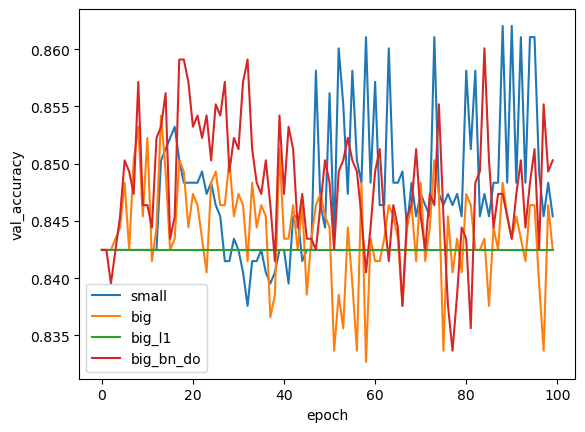

In [27]:
#plotting accuracies for small and big models, small being the reference point

hist_big_2 = pd.DataFrame(history_big_2.history)
hist_big_3 = pd.DataFrame(history_big_3.history)

plt.plot(hist_small.val_accuracy, label = 'small')
plt.plot(hist_big.val_accuracy, label = "big")
plt.plot(hist_big_2.val_accuracy, label = "big_l1")
plt.plot(hist_big_3.val_accuracy, label = "big_bn_do")


plt.xlabel("epoch")
plt.ylabel("val_accuracy")
plt.legend()
plt.savefig('big_vers_acc')


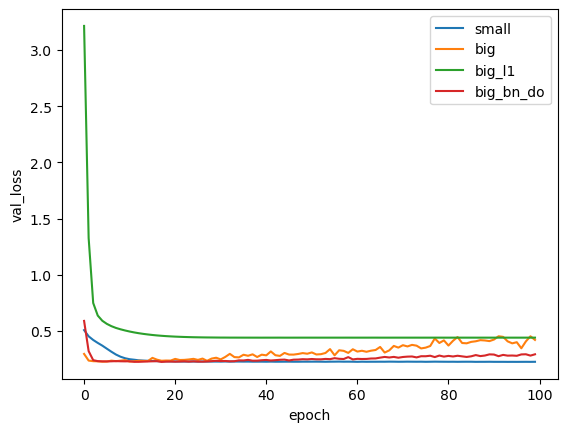

In [28]:
#plotting loss function for small and big models, small being the reference point

plt.plot(hist_small.val_loss, label = 'small')
plt.plot(hist_big.val_loss, label = "big")
plt.plot(hist_big_2.val_loss, label = "big_l1")
plt.plot(hist_big_3.val_loss, label = "big_bn_do")


plt.xlabel("epoch")
plt.ylabel("val_loss")
plt.legend()
plt.savefig('big_vers_loss')


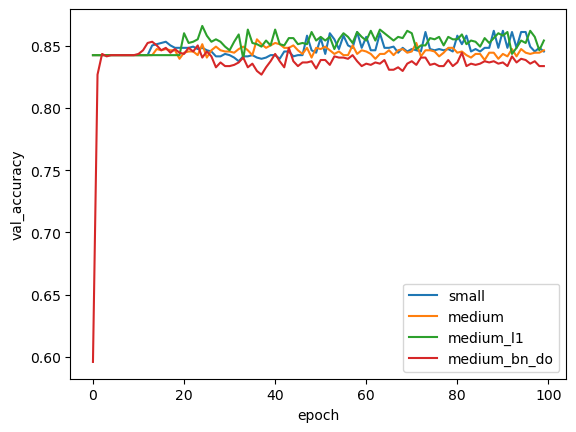

In [29]:
#plotting accuracies for small and medium models, small being the reference point


hist_medium_2 = pd.DataFrame(history_medium_2.history)
hist_medium_3 = pd.DataFrame(history_medium_3.history)

plt.plot(hist_small.val_accuracy, label = 'small')
plt.plot(hist_medium.val_accuracy, label = "medium")
plt.plot(hist_medium_2.val_accuracy, label = "medium_l1")
plt.plot(hist_medium_3.val_accuracy, label = "medium_bn_do")


plt.xlabel("epoch")
plt.ylabel("val_accuracy")
plt.legend()
plt.savefig('medium_vers_acc')

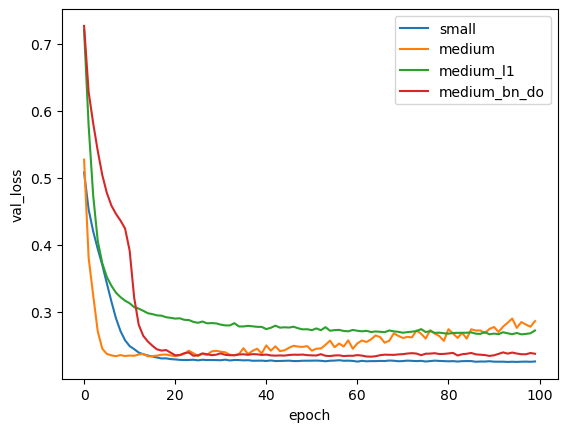

In [30]:
#plotting loss function for small and big models, small being the reference point

plt.plot(hist_small.val_loss, label = 'small')
plt.plot(hist_medium.val_loss, label = "medium")
plt.plot(hist_medium_2.val_loss, label = "medium_l1")
plt.plot(hist_medium_3.val_loss, label = "medium_bn_do")


plt.xlabel("epoch")
plt.ylabel("val_loss")
plt.legend()
plt.savefig('med_vers_val_loss')

In [31]:
#comparing accuracies and loss function of all the models

output = model_small.evaluate(X_test, y_test)
output=model_medium.evaluate(X_test, y_test)
output=model_medium_2.evaluate(X_test, y_test)
output=model_medium_3.evaluate(X_test, y_test)
output = model_big.evaluate(X_test, y_test)
output=model_big_2.evaluate(X_test, y_test)
output=model_big_3.evaluate(X_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.2926 - accuracy: 0.8503
